<a href="https://colab.research.google.com/github/yagel2/TDS_NYC_Airbnb/blob/main/TDS_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**

Loading and Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!wget  --no-clobber https://raw.githubusercontent.com/yagel2/TDS_NYC_Airbnb/main/AB_NYC_2019.csv

df = pd.read_csv('AB_NYC_2019.csv')

File ‘AB_NYC_2019.csv’ already there; not retrieving.



**Visualization 1: Distribution of apartment locations**

We chose this visualization because it shows that the closer you get to the city center, the significantly greater the number of apartments.

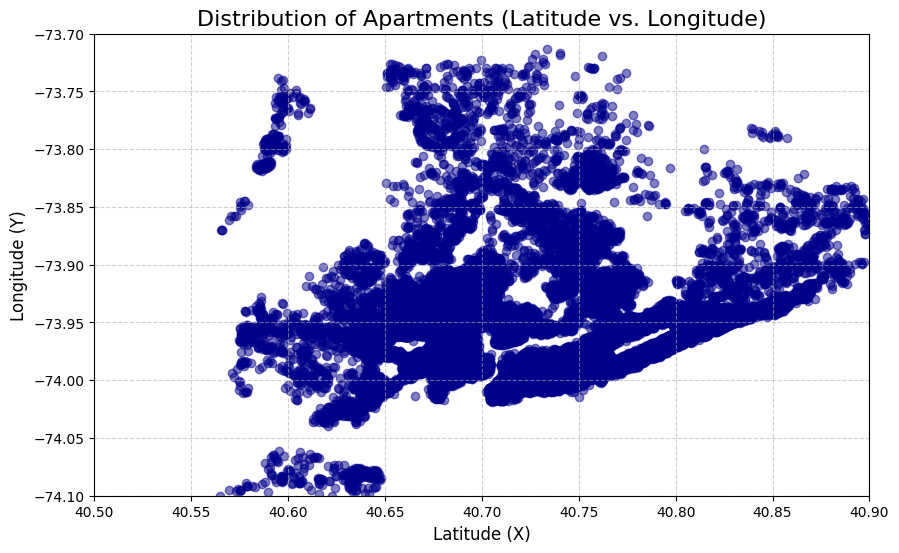

In [2]:
filtered_df = df[(df['latitude'] >= 40.5) & (df['latitude'] <= 40.9) & (df['longitude'] >= -74.1) & (df['longitude'] <= -73.7)]

# 2D scatter plot for latitude and longitude distribution
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['latitude'], filtered_df['longitude'], alpha=0.5, color='darkblue')

# Customize the plot
plt.title('Distribution of Apartments (Latitude vs. Longitude)', fontsize=16)
plt.xlabel('Latitude (X)', fontsize=12)
plt.ylabel('Longitude (Y)', fontsize=12)
plt.xlim(40.5, 40.9)  # Set X-axis range
plt.ylim(-74.1, -73.7)  # Set Y-axis range
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 2: Relationship between apartment rent and distance from the city center**

We chose this visualization because it shows the rent curve, so the further you get from the city center, the lower the apartment rent.

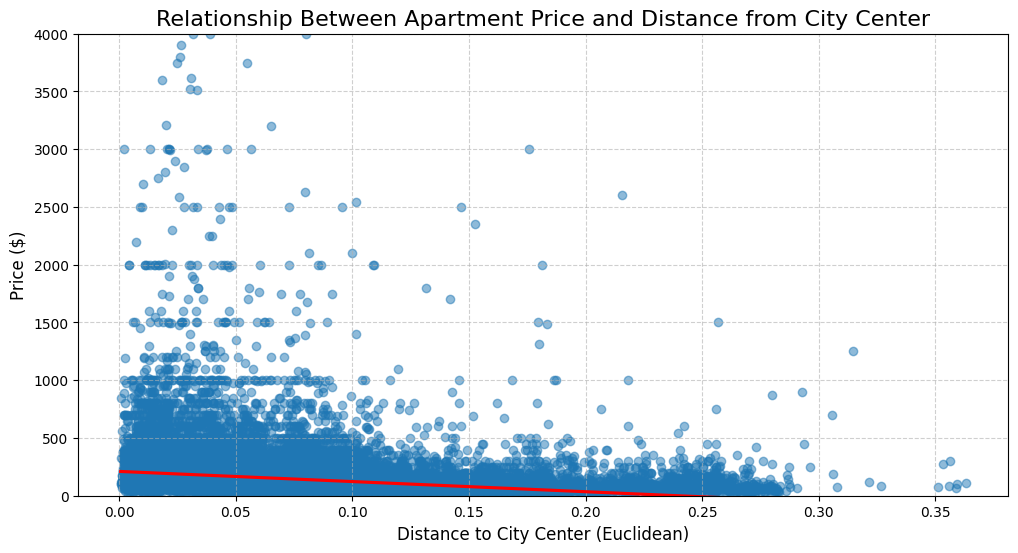

In [3]:
# Define the city center coordinates (Times Square)
city_center_lat = 40.7580
city_center_lon = -73.9855

# Calculate Euclidean distance to the city center
df['distance_to_center'] = np.sqrt(
    (df['latitude'] - city_center_lat)**2 + (df['longitude'] - city_center_lon)**2
)
filtered_df = df[(df['price'] > 0) & (df['price'] <= 4000)]

# Plot scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='distance_to_center', y='price', data=filtered_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Relationship Between Apartment Price and Distance from City Center', fontsize=16)
plt.xlabel('Distance to City Center (Euclidean)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 4000)  # Set y-axis limit to 0-4000
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 3: Average Apartment Price by Neighbourhood Group**

In this visualization, you can see the breakdown of rental prices in the 5 neighborhoods in the city, and from this you can probably also deduce the population in the neighborhoods.

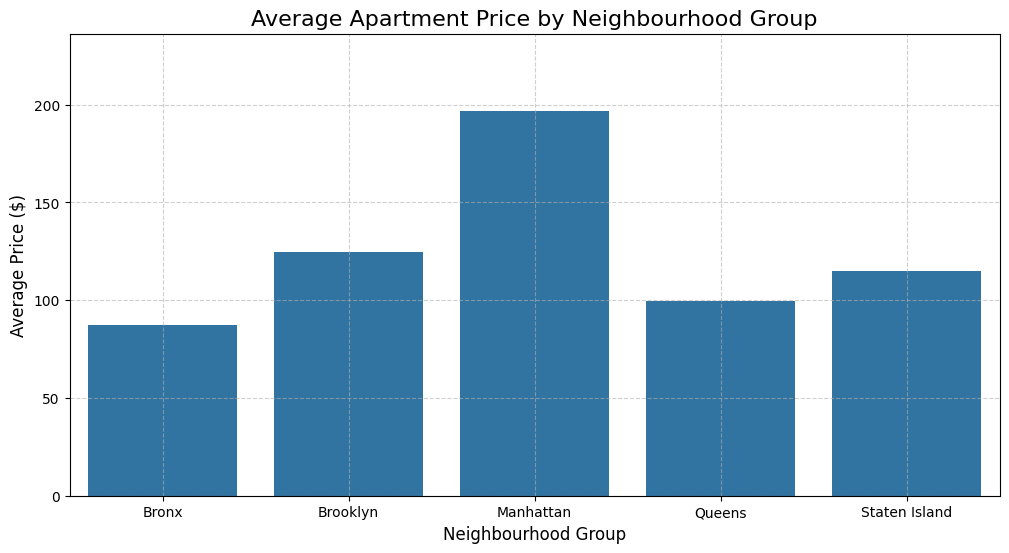

In [4]:
# Group the data by neighbourhood group and calculate average price
neighbourhood_group_stats = df.groupby('neighbourhood_group').agg(
    avg_price=('price', 'mean')
).reset_index()

# Plot the average price as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='neighbourhood_group',
    y='avg_price',
    data=neighbourhood_group_stats
)

# Customize the plot
plt.title('Average Apartment Price by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.ylim(0, neighbourhood_group_stats['avg_price'].max() * 1.2)  # Set y-axis limit
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 4: Average Days Available for Rent by Room Type**

The following visualization shows us which room type is booked more than others. We can see shared rooms are more likely to remain available for rent than a private room or an apartment.

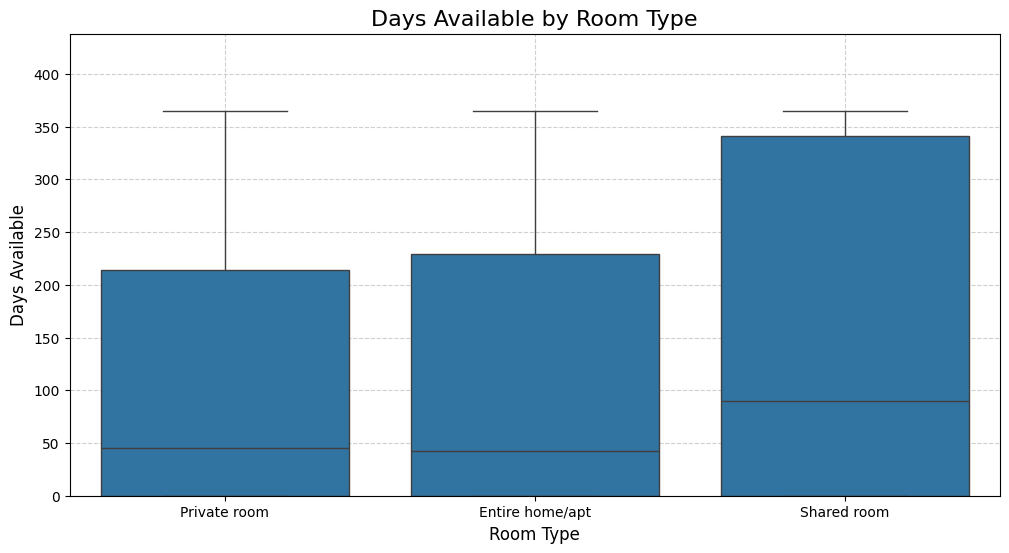

In [5]:
# Plot the days available as a box plot by room type
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='availability_365', data=df)

# Costumize the plot
plt.title('Days Available by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Days Available', fontsize=12)
plt.ylim(0, 365 * 1.2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 5: Average Days Available for Rent by Neighbourhood Group.**

This visualization shows us which neighbourhood are the most popular in new york city for an airbnb rent. we can deduce from this visualization brooklyn is the most popular neighbourhood group and staten island is the least popular.

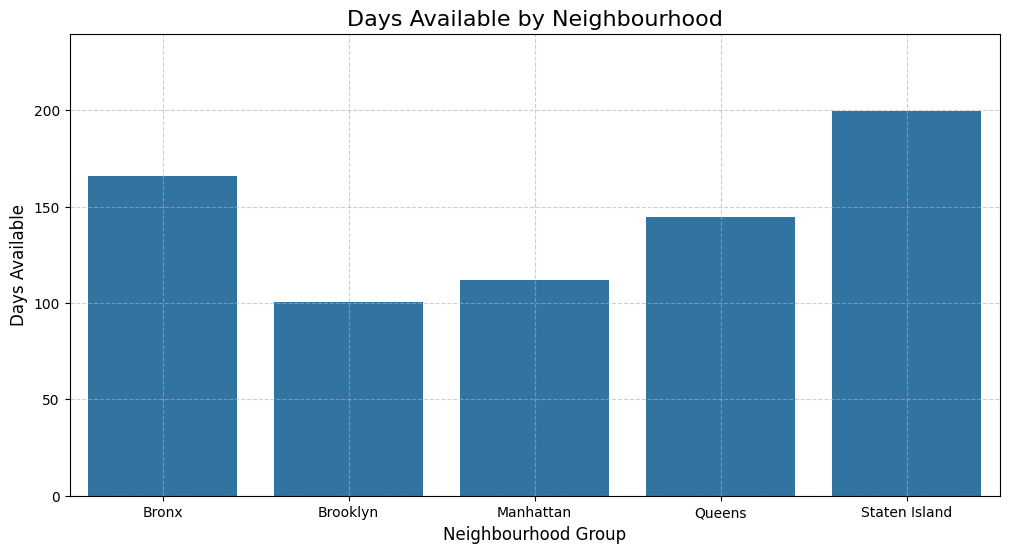

In [6]:
# Group the data by neighbourhood group and calculate average number of days available
neighbourhood_group_stats = df.groupby('neighbourhood_group').agg(
    avg_days_available=('availability_365', 'mean')
).reset_index()

# Plot the average days available as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='avg_days_available', data=neighbourhood_group_stats)

# Costumize the plot
plt.title('Days Available by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Days Available', fontsize=12)
plt.ylim(0, neighbourhood_group_stats['avg_days_available'].max() * 1.2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Part 3**

Data Preprocessing: Handling Missing Values, One-Hot Encoding, and Feature Selection

In [7]:
# Fill missing values in 'reviews_per_month' by reassigning the column directly
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Drop rows with missing values in the 'price' column
df = df.dropna(subset=['price'])

# One-hot encoding
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Feature matrix (X) and target vector (y)
X = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'availability_365', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Queens',
        'room_type_Private room', 'room_type_Shared room']]
y = df['price']

Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building the Regression Model

In [9]:
from xgboost import XGBRegressor

# Initialize the model with default hyperparameters
xgb_model = XGBRegressor()

xgb_model

# Train and make predictions
y_pred = xgb_model.fit(X_train, y_train).predict(X_test)

Evaluating the Model

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 71.35013623645499
Mean Squared Error (MSE): 48278.37802410781
R² Score: -0.09132671356201172


**Part 4**

The plot of the predicted values and the actual values.

<Axes: title={'center': 'Predicted vs. Actual Prices'}, xlabel='Predicted Price ($)', ylabel='Actual Price ($)'>

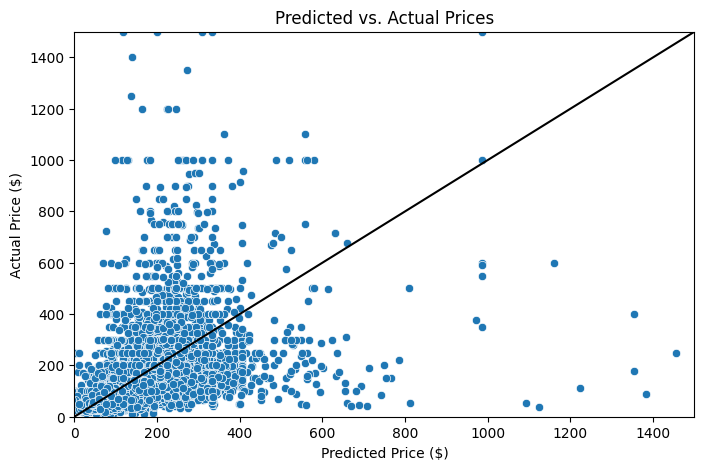

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=y_pred,y=y_test,ax=ax)
ax.set_xlabel('Predicted Price ($)')
ax.set_ylabel('Actual Price ($)')
plt.ylim(0, 1500)
plt.xlim(0, 1500)
ax.set_title('Predicted vs. Actual Prices')
sns.lineplot(x=y_pred,y=y_pred,ax=ax,color='black')

We can see that our model does make mistakes, we will try to analize them. first we will look at the residuals.

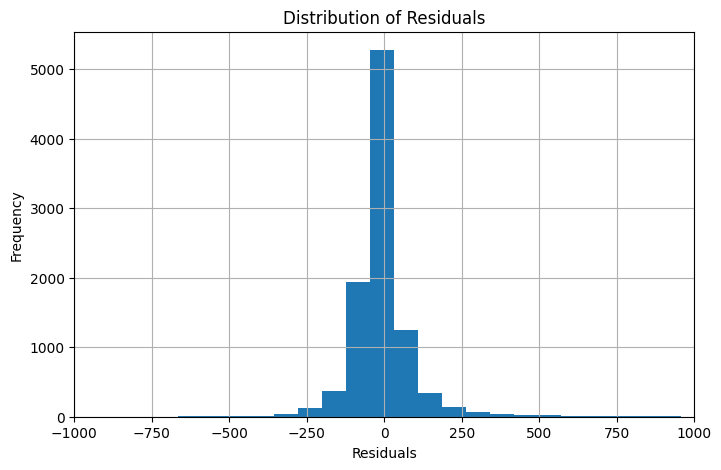

In [12]:
residuals = y_test - y_pred
residuals.hist(bins=250, figsize=(8, 5))
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-1000, 1000)
plt.title('Distribution of Residuals')
plt.show()

(-20.0, 20.0)

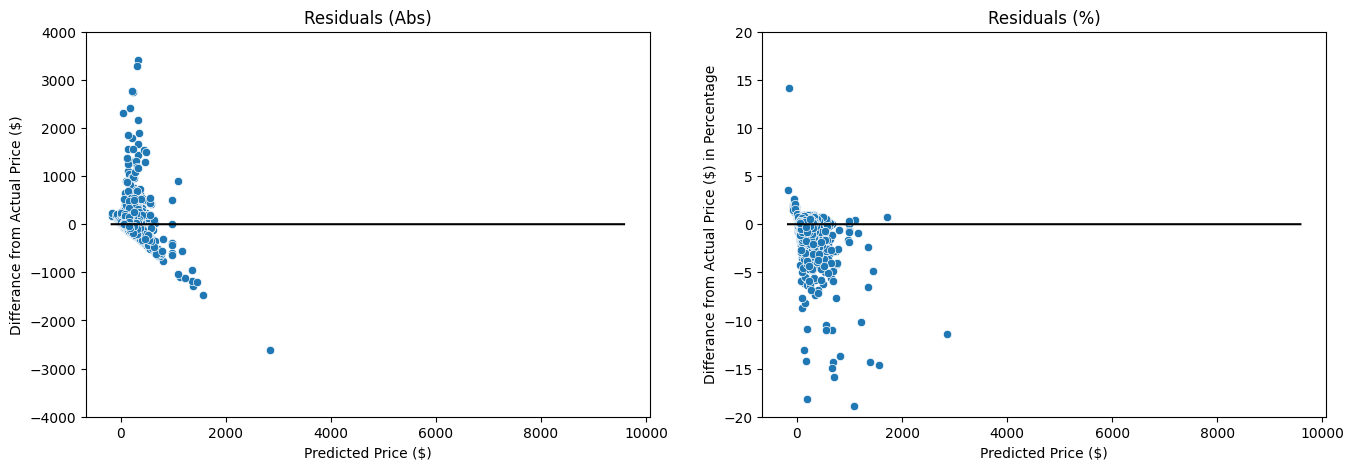

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(x=y_pred,y=residuals,ax=ax[0])
sns.lineplot(x=y_pred,y=0,ax=ax[0],color='black')
ax[0].set_title("Residuals (Abs)")
ax[0].set_xlabel('Predicted Price ($)')
ax[0].set_ylabel('Differance from Actual Price ($)')
ax[0].set_ylim(-4000, 4000)
sns.scatterplot(x=y_pred,y=residuals/y_test,ax=ax[1])
sns.lineplot(x=y_pred,y=0,ax=ax[1],color='black')
ax[1].set_title("Residuals (%)")
ax[1].set_xlabel('Predicted Price ($)')
ax[1].set_ylabel('Differance from Actual Price ($) in Percentage')
ax[1].set_ylim(-20, 20)

We will take a look at the importace of features.

In [14]:
# Get feature importances from the trained model
importances = xgb_model.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                        Feature  Importance
7         room_type_Shared room    0.294781
6        room_type_Private room    0.247880
0                minimum_nights    0.105823
1             number_of_reviews    0.091596
5    neighbourhood_group_Queens    0.087840
3              availability_365    0.063299
4  neighbourhood_group_Brooklyn    0.060490
2             reviews_per_month    0.048290


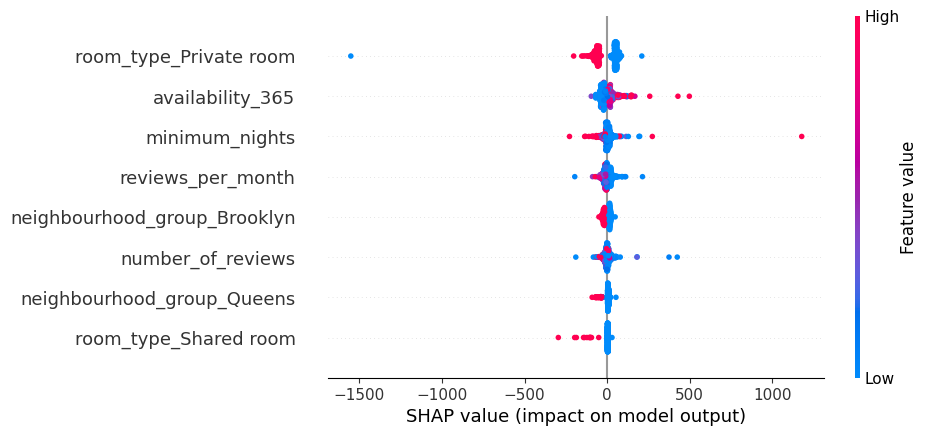

In [15]:
import shap

# Get a sample of values
shap_sample = X_train.sample(500)

# Create an explainer using the trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the training data (or you can use X_test)
shap_values = explainer(shap_sample)

# Plot summary of SHAP values for the features
shap.plots.beeswarm(shap_values)

In order to analize the data we will create data with good estimates(when the differance was small), extimates over 200, under 200 and bad estimates(combined over and under 200)

In [18]:
rel_res=residuals/y_test
rel_res=rel_res.abs()

In [19]:
over_estimates = X_test.loc[residuals[residuals>200].index]

In [20]:
good_estimates = X_test.loc[rel_res[rel_res<0.05].index]

In [21]:
under_estimates = X_test.loc[residuals[residuals<-200].index]

In [22]:
bad_estimates = X_test.loc[residuals[residuals.abs()>200].index]

Our model seems to make more bad estimates when nights available is high, compared to low amount of nights available, where there are significaltly more good estimates.

Text(0, 0.5, 'Amount of Bad Estimates')

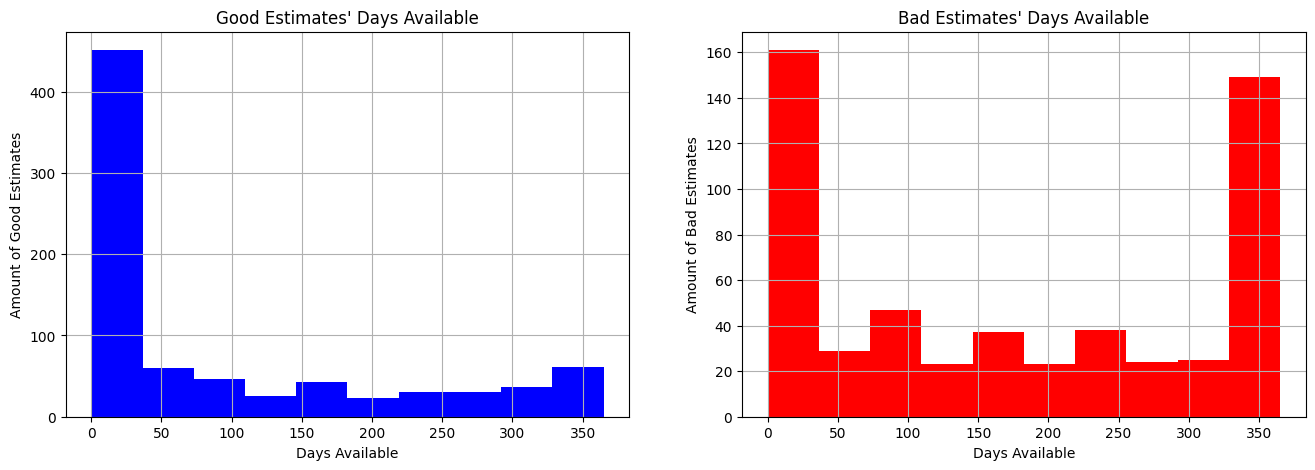

In [23]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

# Plot for good estimates
good_estimates.availability_365.hist(ax=ax[0],color='blue')
ax[0].set_title("Good Estimates' Days Available")
ax[0].set_xlabel('Days Available')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for bad estimates
bad_estimates.availability_365.hist(ax=ax[1],color='red')
ax[1].set_title("Bad Estimates' Days Available")
ax[1].set_xlabel('Days Available')
ax[1].set_ylabel('Amount of Bad Estimates')

Our model makes significantly less bad estimates when the room type is a private room.

Text(0, 0.5, 'Amount of Under Estimates')

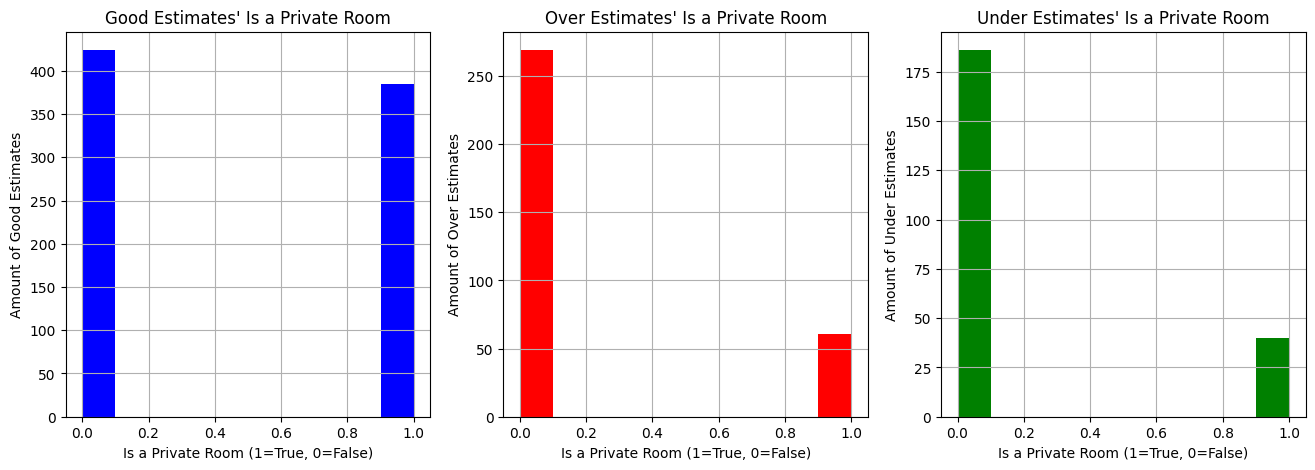

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Plot for good estimates
good_estimates['room_type_Private room'].astype(int).hist(ax=ax[0], color='blue')
ax[0].set_title("Good Estimates' Is a Private Room")
ax[0].set_xlabel('Is a Private Room (1=True, 0=False)')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for overestimated predictions
over_estimates['room_type_Private room'].astype(int).hist(ax=ax[1], color='red')
ax[1].set_title("Over Estimates' Is a Private Room")
ax[1].set_xlabel('Is a Private Room (1=True, 0=False)')
ax[1].set_ylabel('Amount of Over Estimates')

# Plot for underestimated predictions
under_estimates['room_type_Private room'].astype(int).hist(ax=ax[2], color='green')
ax[2].set_title("Under Estimates' Is a Private Room")
ax[2].set_xlabel('Is a Private Room (1=True, 0=False)')
ax[2].set_ylabel('Amount of Under Estimates')


This feature seems to not help our cause whatsoever, as little to no apartments are actually a shared room, and those who are still have more bad estimates than good ones.

Text(0, 0.5, 'Amount of Bad Estimates')

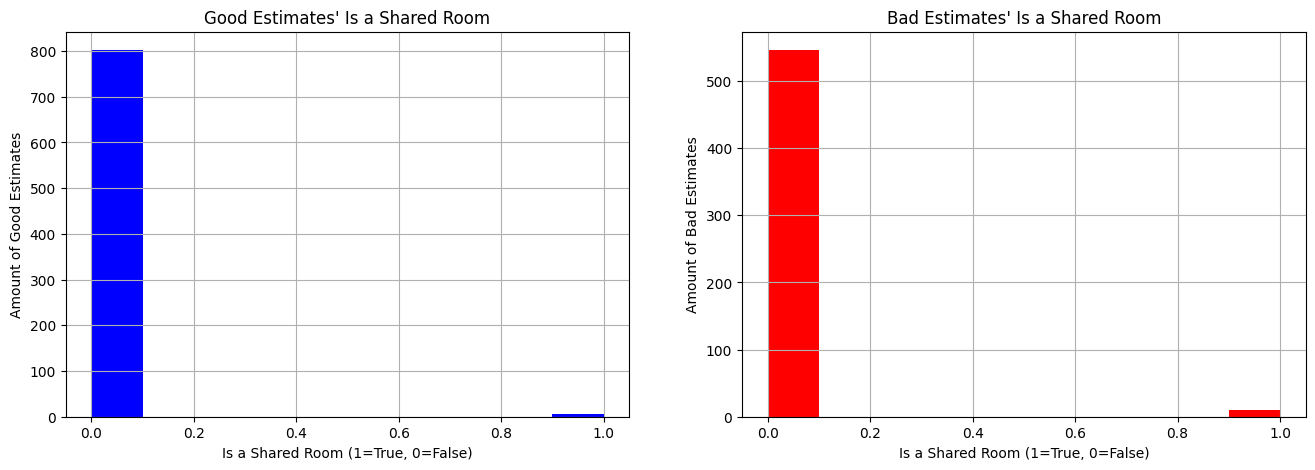

In [25]:
# Assuming 'is_available' is the boolean feature
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Plot for good estimates
good_estimates['room_type_Shared room'].astype(int).hist(ax=ax[0], color='blue')
ax[0].set_title("Good Estimates' Is a Shared Room")
ax[0].set_xlabel('Is a Shared Room (1=True, 0=False)')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for overestimated predictions
bad_estimates['room_type_Shared room'].astype(int).hist(ax=ax[1], color='red')
ax[1].set_title("Bad Estimates' Is a Shared Room")
ax[1].set_xlabel('Is a Shared Room (1=True, 0=False)')
ax[1].set_ylabel('Amount of Bad Estimates')

Our model seems to overestimate more than underestimate when there are more reviews per month.

Text(0, 0.5, 'Amount of Under Estimates')

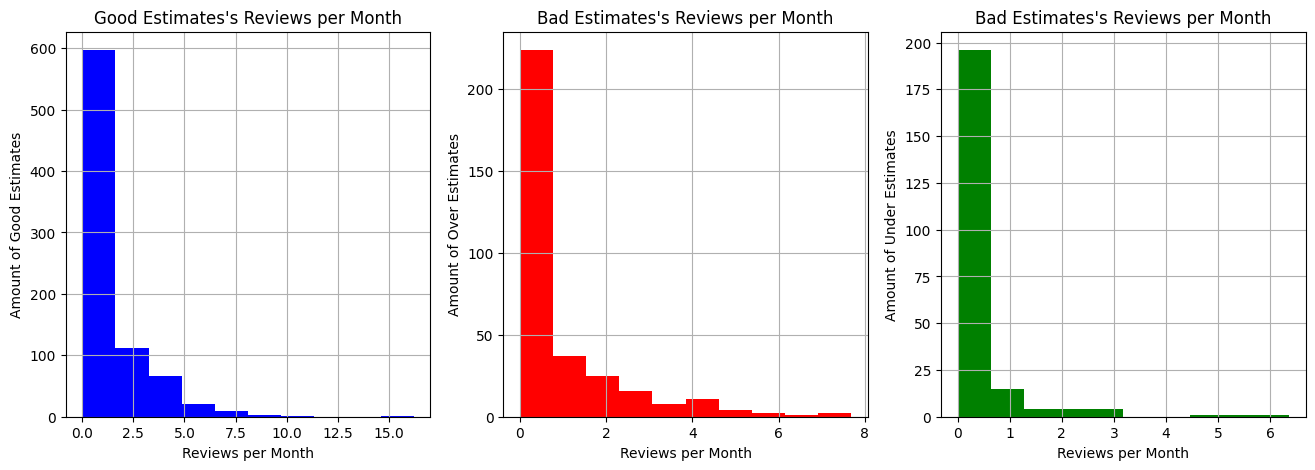

In [26]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

# Plot for good estimates
good_estimates.reviews_per_month.hist(ax=ax[0],color='blue')
ax[0].set_title("Good Estimates's Reviews per Month")
ax[0].set_xlabel('Reviews per Month')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for overestimated predictions
over_estimates.reviews_per_month.hist(ax=ax[1],color='red')
ax[1].set_title("Bad Estimates's Reviews per Month")
ax[1].set_xlabel('Reviews per Month')
ax[1].set_ylabel('Amount of Over Estimates')

# Plot for underestimated predictions
under_estimates.reviews_per_month.hist(ax=ax[2],color='green')
ax[2].set_title("Bad Estimates's Reviews per Month")
ax[2].set_xlabel('Reviews per Month')
ax[2].set_ylabel('Amount of Under Estimates')

Our model seems to estimate better when the minimum nights to rent is lower.

(0.0, 62.0)

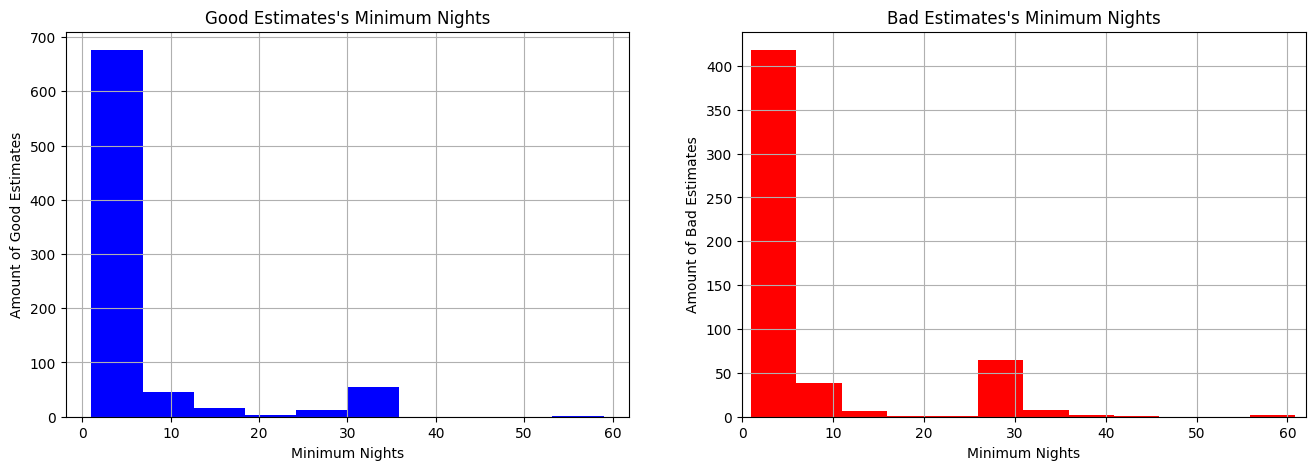

In [27]:
fig, ax = plt.subplots(1,2,figsize=(16,5))

# Plot for good estimates
good_estimates.minimum_nights.hist(ax=ax[0],color='blue')
ax[0].set_title("Good Estimates's Minimum Nights")
ax[0].set_xlabel('Minimum Nights')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for bad estimates
bad_estimates.minimum_nights.hist(ax=ax[1],color='red', bins = 100)
ax[1].set_title("Bad Estimates's Minimum Nights")
ax[1].set_xlabel('Minimum Nights')
ax[1].set_ylabel('Amount of Bad Estimates')
ax[1].set_xlim(0, 62)

The additional information of being in brooklyn helped our model make less bad predictions than good ones

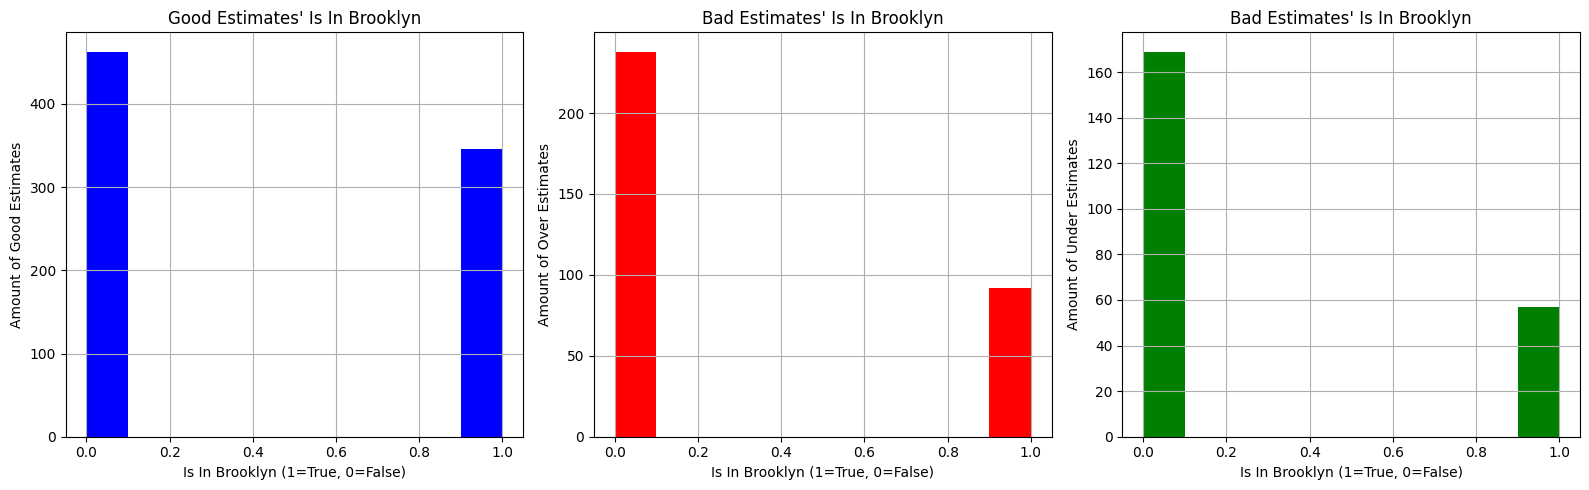

In [28]:
# Assuming 'is_available' is the boolean feature
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

# Plot for good estimates
good_estimates['neighbourhood_group_Brooklyn'].astype(int).hist(ax=ax[0], color='blue')
ax[0].set_title("Good Estimates' Is In Brooklyn")
ax[0].set_xlabel('Is In Brooklyn (1=True, 0=False)')
ax[0].set_ylabel('Amount of Good Estimates')

# Plot for overestimated predictions
over_estimates['neighbourhood_group_Brooklyn'].astype(int).hist(ax=ax[1], color='red')
ax[1].set_title("Bad Estimates' Is In Brooklyn")
ax[1].set_xlabel('Is In Brooklyn (1=True, 0=False)')
ax[1].set_ylabel('Amount of Over Estimates')

# You can modify or add another comparison if necessary, just like over_estimates or good_estimates
under_estimates['neighbourhood_group_Brooklyn'].astype(int).hist(ax=ax[2], color='green')
ax[2].set_title("Bad Estimates' Is In Brooklyn")
ax[2].set_xlabel('Is In Brooklyn (1=True, 0=False)')
ax[2].set_ylabel('Amount of Under Estimates')

plt.tight_layout()
plt.show()